In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from model import *
#from loss import *

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


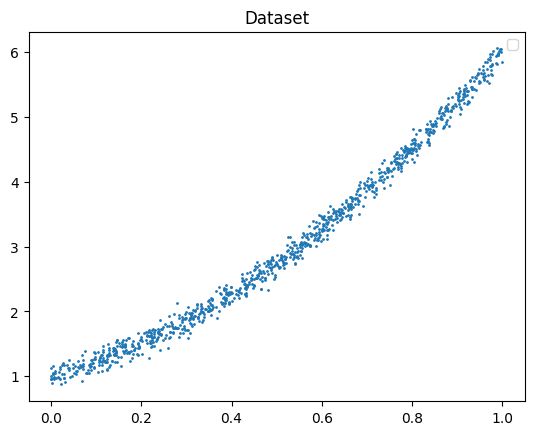

In [2]:
f = lambda x: 3*x**2 + 2*x+ 1.0

xs = np.random.rand(1000, 1)   # 1000 points
ys = f(xs) + 0.1*np.random.randn(1000, 1)

plt.title("Dataset")
plt.scatter(xs, ys, s=1)
plt.legend()
plt.show()

In [3]:
poly = PolynomialModel()
mse = PolyMSE()
mse.get_grad_mse(model=poly, x=xs, y_true=ys)

NameError: name 'PolynomialModel' is not defined

In [ ]:
history = [poly.get_params()]

count = 0
prev_err = 0
early_stop_criterion = 0  #리소스 절약용 -> 원래는 overfitting을 방지하기 위해 사용
# early stop 조건이 너무 커서, 예상값과 차이가 벌어짐. 
for epoch in range(5000): # epoch 값이 작은 것도 영향을 미침. 
  grad = mse.get_grad_mse(poly, xs, ys)
  mse.update(poly, 0.2, **grad)
  err = mse.get_mse(poly(xs), ys)
  if abs(err - prev_err) < early_stop_criterion:
    count += 1
  else:
    count = 0
  prev_err = err
  if count == 3:
    print(f"Early stop with epoch {epoch}")
    print(f"Last status: mse={err:.4f}, w1={params.get('w1'):.4f}, w2={params.get('w2'):.4f}, b={params.get('b'):.4f}")
    break
  params = poly.get_params()
  history.append(params)
  print(f"Epoch {epoch+1}: mse={err:.4f}, w1={params.get('w1'):.4f}, w2={params.get('w2'):.4f}, b={params.get('b'):.4f}")